In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('crocs_reviews_cleaned.csv')
df

,author_name,review_title,review_text,product_rating,product_colour,men_size,women_size,review_helpfullness,review_date
0,Outdoor Enthusiast!,Not the good made in USA ones of years ago,"I have worn Crocs for years, but the well-ma...",1,Grass Green,9.0,7.0,367,2018
1,MoMo Wondertoes,Two completely different sized shoes marked th...,We have been buying crocs for a long time an...,1,Black,7.0,5.0,327,2017
2,PJM,Love Crocs but....,I was hoping these would fit like the Classi...,1,Navy,9.0,7.0,157,2018
3,Shemit,Not buying Crocs.,I would never recommend the now-a-day Crocs ...,1,Black,7.0,5.0,154,2017
4,Amazon Customer,Didn't last a month,I bought these to replace an earlier pair wh...,1,Navy,11.0,9.0,71,2018
...,...,...,...,...,...,...,...,...,...
8691,Tim H.,Just buy crocs,"Crocs are great, simple and comfortable always",5,Black,6.0,4.0,0,2019
8692,Avainyuna,review,Your browser does not support HTML5 video. ...,5,White,8.0,6.0,0,2020
8693,Patricia L. Meyer,Very nice,"Bought for granddaughter, she loves them",5,New Mint,9.0,7.0,0,2019
8694,K. lee,Great buy.,Fits and feels very comfortable. Perfect for...,5,Navy,11.0,9.0,0,2019


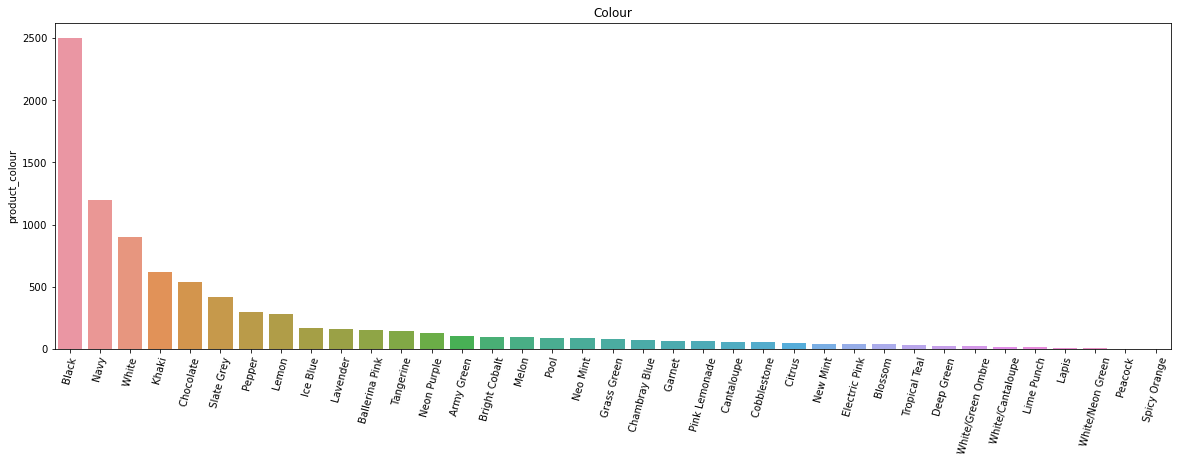

In [6]:
colour_counts = df['product_colour'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=colour_counts.index, y=colour_counts)
plt.xticks(rotation=75)
plt.title('Colour')
plt.show()

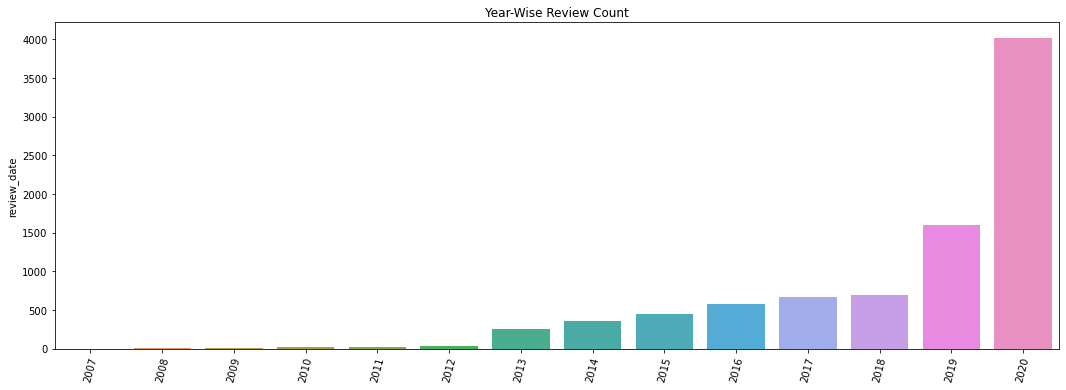

In [7]:
review_counts_date_wise = df['review_date'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=review_counts_date_wise.index, y=review_counts_date_wise)
plt.xticks(rotation=75)
plt.title('Year-Wise Review Count')
plt.show()

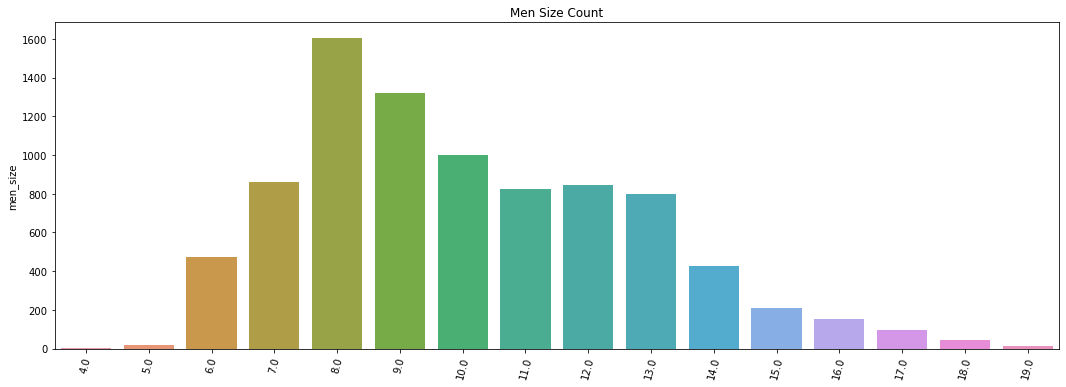

In [8]:
men_size_counts = df['men_size'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=men_size_counts.index, y=men_size_counts)
plt.xticks(rotation=75)
plt.title('Men Size Count')
plt.show()

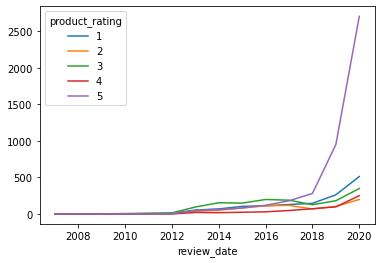

<Figure size 1296x432 with 0 Axes>

In [10]:
pd.crosstab(df['review_date'], df['product_rating']).plot(kind="line")
plt.figure(figsize=(18,6))
plt.show()

### Question 1: What are the top 5 most important words used in the Product Review ?

Let's try to answer this question by using the <b>text mining techniques</b> and <b>wordcloud</b>

First, we will join all the reviews into a single paragraph

In [3]:
crocs_reviews_string = " ".join(df['review_text'])

Since we don't want any unwanted symbols, we will first remove, if any.

Then we will split the complete string into individual words, so that we can remove the stopwords from them. At this time we add the product name to the list of the `stop_words` to get a better result.

After removing the stopwords, we will join the words again and form a paragraph.

In [4]:
# Removing unwanted symbols incase if exists
crocs_reviews_string = re.sub("[^A-Za-z" "]+"," ",crocs_reviews_string).lower()
crocs_reviews_string = re.sub("[0-9" "]+"," ",crocs_reviews_string)


# words that contained in crocs reviews
crocs_reviews_words = crocs_reviews_string.split(" ")


stop_words = stopwords.words('english')
newStopWords = ['croc', 'shoe', 'crocs', 'shoes']
stop_words.extend(newStopWords)

crocs_reviews_words = [w for w in crocs_reviews_words if not w in stop_words]
# Joinining all the reviews into single paragraph 
crocs_reviews_string = " ".join(crocs_reviews_words)

In [5]:
crocs_reviews_string

' worn years well made ones came usa colorado many years ago made china ones harder plastic extremely wide feet slip around fall also anywhere near comfortable due harder plastic even fit properly already started return process disappointed since many years american made ones finally starting wear need replacing buying long time time received marked right size one significantly smaller narrow something realized leaving vacation year old constantly complained one small large wear could find store buy flip flops return time got back worn sure happened definitely two different sizes hoping would fit like classic clog already still feel small third pair ordered lately seem find fit hoping ended donating others value village since worn couple times none seemed roomy ones almost worn love frustrated trying find right fit would never recommend day clogs anyonecrocs unisex classic clog black us men us women worn pair clogs years decided time replace clogs nothing like clogs years ago sad say q

Finally, we make a wordcloud by using the paragraph to see the top 5 most important and frequently used words in the product review.

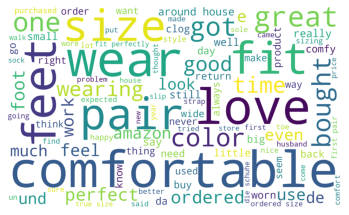

dict_keys(['comfortable', 'wear', 'love', 'feet', 'fit', 'pair', 'size', 'great', 'one', 'got', 'bought', 'color', 'time', 'wearing', 'good', 'perfect', 'ordered', 'foot', 'feel', 'e', 'work', 'use', 'amazon', 'even', 'much', 'und', 'de', 'look', 'around house', 'really', 'say', 'well', 'still', 'worn', 'small', 'da', 'little', 'buy', 'go', 'need', 'big', 'day', 'return', 'back', 'know', 'comfy', 'clog', 'product', 'thing', 'wide', 'think', 'always', 'right', 'make', 'order', 'used', 'way', 'never', 'want', 'seem', 'purchased', 'style', 'happy', 'nice', 'sizing', 'lot', 'expected', 'year', 'going', 'first pair', 'find', 'put', 'comfort', 'un', 'ordered size', 'came', 'strap', 'toe', 'made', 'wore', 'better', 'problem', 'sole', 'husband', 'thought', 'sure', 'said', 'tried', 'first', 'house', 'fit perfectly', 'walk', 'come', 'sock', 'true size', 'price', 'die schuhe', 'slip', 'store', 'new'])


In [13]:
crocs_wordcloud = WordCloud(
                      background_color='white',
                    width=2000,
                    height=1200,
                      max_words = 100
                     ).generate(crocs_reviews_string)

plt.imshow(crocs_wordcloud)
plt.axis("off")
plt.show()
print(crocs_wordcloud.words_.keys())

### Answer 1: So by the above wordcloud and the dictionary, we can see that the top 5 words used in the reviews are:
1. comfortable 
2. wear 
3. love 
4. feet 
5. fit